## DAB200 -- Graded Lab 3

In this lab, you will gain some experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14_missing.csv |
| 4-5 | veh15_missing.csv |
| 6-8 | veh16_missing.csv |
| 9-11 | veh17_missing.csv |
| 12-14 | veh18_missing.csv |
| 15-16 | veh19_missing.csv |

**Important Notes:**
- Use [Chapter 7](https://mlbook.explained.ai/bulldozer-intro.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number - 8 
 - Group Members
     - Vishant Bhatia (0798567)
     - Tulaib Bin Ayyub (0789141)
     - Faizal Akram Shaikh (0816124)|
     - Mahima Mehandiratta (0801962)


     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - use Section 7.3 of the textbook as a guide, except:
     - use all of the data; and
     - use 150 decision trees in your random forest models
 - read in the data
 - isolate all numeric features from original data set
 - fill in any missing values with 0
 - create and evaluate a baseline model 

#### Code (10 marks)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from rfpimp import *
import math 
import category_encoders as ce

In [2]:
def evaluate(X,y):
    oob_score = []
    n = []
    h = []
    for i in range(10):
        rf = RandomForestRegressor(n_estimators=150,n_jobs=-1,oob_score=True)
        rf.fit(X,y)
        oob_score.append(round(rf.oob_score_,5))
        n.append(rfnnodes(rf))
        h.append(np.median(rfmaxdepths(rf)))
        #print(round(rf.score(X,y),6))
        print(f'OOB R^2 is {oob_score[i]:.5f} using {n[i]:d} tree nodes with {h[i]} median tree depth')
    print("--------------------------------------------------------------------------------------")
    print(f'Average of OOB R^2 is {np.mean(oob_score):.5f} using average {math.trunc(round(np.mean(n),0))} tree nodes with average {round(np.mean(h),2)} median tree depth')
    return rf, np.mean(oob_score)

In [3]:
def showimp(rf,X,y):
    feature = list(X.columns)
    I = importances(rf,X,y,features=feature)
    plot_importances(I,color='#4575b4')

In [4]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
df_veh = pd.read_csv("veh16_missing.csv")
df_veh.head().T

,0,1,2,3,4
Eng Displ,NaN,NaN,1.8,3.5,NaN
# Cyl,4,4,4,6,6
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6,6,6,6,6
Max Ethanol % - Gasoline,10.0,10.0,15.0,10.0,85.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Trans Creeper Gear,N,N,N,N,N
Unique Label?,N,N,N,N,N
Air Aspiration Method Desc,Naturally Aspirated,none given,none given,none given,Naturally Aspirated


In [6]:
df_veh.shape

(1213, 12)

In [7]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          845 non-null    float64
 1   # Cyl                              1213 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1213 non-null   object 
 3   # Gears                            1213 non-null   int64  
 4   Max Ethanol % - Gasoline           1187 non-null   float64
 5   Intake Valves Per Cyl              1213 non-null   int64  
 6   Exhaust Valves Per Cyl             1213 non-null   int64  
 7   Trans Creeper Gear                 1213 non-null   object 
 8   Unique Label?                      1136 non-null   object 
 9   Air Aspiration Method Desc         1213 non-null   object 
 10  Fuel Metering Sys Desc             1213 non-null   object 
 11  Cyl Deact?                         985 non-null    objec

In [8]:
df_veh.describe()

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl
count,845.000000,1213.000000,1213.000000,1187.000000,1213.000000,1213.000000
mean,3.053373,5.629019,6.510305,15.572873,1.927453,1.921682
std,1.339220,1.846649,1.429048,17.385143,0.259499,0.268783
min,0.900000,3.000000,1.000000,10.000000,1.000000,1.000000
25%,2.000000,4.000000,6.000000,10.000000,2.000000,2.000000
50%,3.000000,6.000000,6.000000,10.000000,2.000000,2.000000
75%,3.600000,6.000000,8.000000,15.000000,2.000000,2.000000
max,8.400000,12.000000,9.000000,85.000000,2.000000,2.000000


In [9]:
df_veh['Eng Displ'].unique()

array([nan, 1.8, 3.5, 3.4, 2.5, 2. , 6.3, 6.2, 1.5, 3. , 1.4, 3.6, 6.7,
       4. , 1.6, 2.4, 6.5, 2.7, 5. , 3.7, 6. , 3.8, 5.7, 5.5, 5.9, 1. ,
       6.4, 4.7, 5.3, 2.8, 0.9, 3.3, 4.6, 4.4, 5.2, 4.3, 4.8, 3.9, 6.6,
       2.3, 8.4, 5.6, 6.8])

In [10]:
df_veh['# Cyl'].unique()

array([ 4,  6, 12,  8,  3, 10,  5], dtype=int64)

In [11]:
df_veh['# Gears'].unique()

array([6, 8, 7, 9, 5, 1, 4], dtype=int64)

In [12]:
df_veh['Max Ethanol % - Gasoline'].unique()

array([10., 15., 85., nan])

In [13]:
df_veh['Intake Valves Per Cyl'].unique()

array([2, 1], dtype=int64)

In [14]:
df_veh['Exhaust Valves Per Cyl'].unique()

array([2, 1], dtype=int64)

In [15]:
df_veh['Comb Unadj FE - Conventional Fuel'].unique() # we have "Mod" in this 

array(['32.8729', '41.5766', '42.3624', '29.3963', '25.4694', '27.9923',
       '25.6217', '28.7955', '25.5194', '36.1046', '42.6092', '36.0247',
       '25.1277', '27.925', '31.0325', '34.7404', '28.044', '17.0002',
       '32.9334', '22.0201', '21.6821', '43.1463', '31.0576', '29.8129',
       '27.723', '33.7222', '30.4958', '47.715', '18.7023', '40.434',
       '33.1491', '20.076', '29.3854', '21.0918', '17.4989', '34.2453',
       '36.703', '30.722', '36.4494', '46.403', '21.7662', '22.577',
       '28.7377', '19.0572', '39.9942', '22.3336', '36.5144', '33.0335',
       '23.4292', '16.2581', '25.263', '21.2882', '34.2607', '19.7548',
       '31.9339', '34.3738', '26.7662', '29.8923', '50.1953', '38.0027',
       '31.9024', '42.8024', '35.3153', '34.7884', '46.6393', '40.0936',
       '35.8215', '33.9853', '25.6832', '27.3233', '38.6615', '17.2204',
       '40.4893', '37.46', '29.4792', '26.3559', '30.2755', '28.5872',
       '34.858', '31.4586', '26.2931', '37.7104', '25.5795', '26

In [16]:
df_veh.loc[df_veh["Comb Unadj FE - Conventional Fuel"]=='Mod']

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Trans Creeper Gear,Unique Label?,Air Aspiration Method Desc,Fuel Metering Sys Desc,Cyl Deact?
124,3.0,6,Mod,8,NaN,2,2,N,N,none given,Common Rail Direct Diesel Injection,
863,3.0,6,Mod,8,NaN,2,2,N,N,Turbocharged,@@@@@,N
878,NaN,6,Mod,8,NaN,2,2,N,N,Turbocharged,Common Rail Direct Diesel Injection,


### In 'Comb Unadj FE - Conventional Fuel' column we have 'Mod' so, we are removing those rows.

In [17]:
df_veh.drop([124,863,878],inplace=True) # Removing rows

In [18]:
df_veh['Comb Unadj FE - Conventional Fuel'] = df_veh['Comb Unadj FE - Conventional Fuel'].astype(float)

In [19]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          843 non-null    float64
 1   # Cyl                              1210 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1210 non-null   float64
 3   # Gears                            1210 non-null   int64  
 4   Max Ethanol % - Gasoline           1187 non-null   float64
 5   Intake Valves Per Cyl              1210 non-null   int64  
 6   Exhaust Valves Per Cyl             1210 non-null   int64  
 7   Trans Creeper Gear                 1210 non-null   object 
 8   Unique Label?                      1133 non-null   object 
 9   Air Aspiration Method Desc         1210 non-null   object 
 10  Fuel Metering Sys Desc             1210 non-null   object 
 11  Cyl Deact?                         982 non-null    objec

In [21]:
# Creating copy
df_veh_copy_part1 = df_veh.copy()

In [22]:
df_veh_copy_part1.head().T

,0,1,2,3,4
Eng Displ,NaN,NaN,1.8,3.5,NaN
# Cyl,4,4,4,6,6
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6,6,6,6,6
Max Ethanol % - Gasoline,10.0,10.0,15.0,10.0,85.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Trans Creeper Gear,N,N,N,N,N
Unique Label?,N,N,N,N,N
Air Aspiration Method Desc,Naturally Aspirated,none given,none given,none given,Naturally Aspirated


#### Checking for Null Values in the dataset

In [23]:
df_veh_copy_part1.isnull().sum()

Eng Displ                            367
# Cyl                                  0
Comb Unadj FE - Conventional Fuel      0
# Gears                                0
Max Ethanol % - Gasoline              23
Intake Valves Per Cyl                  0
Exhaust Valves Per Cyl                 0
Trans Creeper Gear                     0
Unique Label?                         77
Air Aspiration Method Desc             0
Fuel Metering Sys Desc                 0
Cyl Deact?                           228
dtype: int64

#### There are Null Values in this dataset

#### Now lets see which column have how much percent of null values 

In [24]:
sniff_modified(df_veh_copy_part1)

,data type,percent missing,No. unique,unique values
# Cyl,int64,0.000000,7,"[4, 6, 12, 8, 3, 10, 5]"
# Gears,int64,0.000000,7,"[6, 8, 7, 9, 5, 1, 4]"
Intake Valves Per Cyl,int64,0.000000,2,"[2, 1]"
Exhaust Valves Per Cyl,int64,0.000000,2,"[2, 1]"
Eng Displ,float64,30.330579,43,"[nan, 1.8, 3.5, 3.4, 2.5, 2.0, 6.3, 6.2, 1.5, ..."
Comb Unadj FE - Conventional Fuel,float64,0.000000,929,"[32.8729, 41.5766, 42.3624, 29.3963, 25.4694, ..."
Max Ethanol % - Gasoline,float64,1.900826,4,"[10.0, 15.0, 85.0, nan]"
Trans Creeper Gear,object,0.000000,2,"[N, Y]"
Unique Label?,object,6.363636,3,"[N, Y, nan]"
Air Aspiration Method Desc,object,0.000000,5,"[Naturally Aspirated, none given, Turbocharged..."


#### As we see some of the  numerical columns have missing value like Eng Displ	, Max Ethanol % - Gasoline etc. and for meanwhile  we will replace missing value with zero by using .fillna() function

In [25]:
df_veh_copy_part1.fillna(0,inplace=True)

In [26]:
df_veh_copy_part1.isnull().sum()

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Trans Creeper Gear                   0
Unique Label?                        0
Air Aspiration Method Desc           0
Fuel Metering Sys Desc               0
Cyl Deact?                           0
dtype: int64

In [27]:
sniff_modified(df_veh_copy_part1)

,data type,percent missing,No. unique,unique values
# Cyl,int64,0.0,7,"[4, 6, 12, 8, 3, 10, 5]"
# Gears,int64,0.0,7,"[6, 8, 7, 9, 5, 1, 4]"
Intake Valves Per Cyl,int64,0.0,2,"[2, 1]"
Exhaust Valves Per Cyl,int64,0.0,2,"[2, 1]"
Eng Displ,float64,0.0,43,"[0.0, 1.8, 3.5, 3.4, 2.5, 2.0, 6.3, 6.2, 1.5, ..."
Comb Unadj FE - Conventional Fuel,float64,0.0,929,"[32.8729, 41.5766, 42.3624, 29.3963, 25.4694, ..."
Max Ethanol % - Gasoline,float64,0.0,4,"[10.0, 15.0, 85.0, 0.0]"
Trans Creeper Gear,object,0.0,2,"[N, Y]"
Unique Label?,object,0.0,3,"[N, Y, 0]"
Air Aspiration Method Desc,object,0.0,5,"[Naturally Aspirated, none given, Turbocharged..."


#### Now it has no missing value and we can make baseline model.

In [28]:
 num_features = ['Eng Displ','# Cyl','# Gears','Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl']

In [29]:
# Baseline evaluation 
X = df_veh_copy_part1[num_features]
y = df_veh_copy_part1['Comb Unadj FE - Conventional Fuel']


In [30]:
rf_baseline,oob_score_baseline = evaluate(X,y)

OOB R^2 is 0.77810 using 54082 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77806 using 53936 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77870 using 53998 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77750 using 53898 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77830 using 53910 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77789 using 54006 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77826 using 54004 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77846 using 53944 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77773 using 54070 tree nodes with 15.0 median tree depth
OOB R^2 is 0.77710 using 54140 tree nodes with 15.0 median tree depth
--------------------------------------------------------------------------------------
Average of OOB R^2 is 0.77801 using average 53999 tree nodes with average 15.0 median tree depth


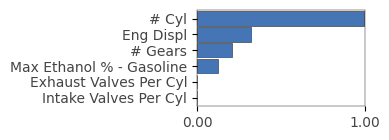

In [31]:
showimp(rf_baseline,X,y)

### Part 2 - Normalize missing values

In this part you should: 
 - use Section 7.4 of the textbook as a guide
 - convert **all** representations of missing data to a **single** representation
 
#### Code (15 marks)

In [32]:
df_veh_copy_part2 = df_veh.copy()

In [33]:
df_veh_copy_part2.head().T

,0,1,2,3,4
Eng Displ,NaN,NaN,1.8,3.5,NaN
# Cyl,4,4,4,6,6
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6,6,6,6,6
Max Ethanol % - Gasoline,10.0,10.0,15.0,10.0,85.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Trans Creeper Gear,N,N,N,N,N
Unique Label?,N,N,N,N,N
Air Aspiration Method Desc,Naturally Aspirated,none given,none given,none given,Naturally Aspirated


In [34]:
df_veh_copy_part2.isnull().sum()

Eng Displ                            367
# Cyl                                  0
Comb Unadj FE - Conventional Fuel      0
# Gears                                0
Max Ethanol % - Gasoline              23
Intake Valves Per Cyl                  0
Exhaust Valves Per Cyl                 0
Trans Creeper Gear                     0
Unique Label?                         77
Air Aspiration Method Desc             0
Fuel Metering Sys Desc                 0
Cyl Deact?                           228
dtype: int64

In [35]:
df_veh_copy_part2['Eng Displ'].unique() # we have nan here 

array([nan, 1.8, 3.5, 3.4, 2.5, 2. , 6.3, 6.2, 1.5, 3. , 1.4, 3.6, 6.7,
       4. , 1.6, 2.4, 6.5, 2.7, 5. , 3.7, 6. , 3.8, 5.7, 5.5, 5.9, 1. ,
       6.4, 4.7, 5.3, 2.8, 0.9, 3.3, 4.6, 4.4, 5.2, 4.3, 4.8, 3.9, 6.6,
       2.3, 8.4, 5.6, 6.8])

In [36]:
df_veh_copy_part2['Max Ethanol % - Gasoline'].unique() #we have "nan" here 

array([10., 15., 85., nan])

In [37]:
df_veh_copy_part2['Unique Label?'].unique() # we have "nan" here

array(['N', 'Y', nan], dtype=object)

In [38]:
df_veh_copy_part2['Air Aspiration Method Desc'].unique() # we have "none given" here 

array(['Naturally Aspirated', 'none given', 'Turbocharged',
       'Supercharged', 'Turbocharged+Supercharged'], dtype=object)

In [39]:
df_veh_copy_part2['Fuel Metering Sys Desc'].unique() # we have "@@@@@" here

array(['Multipoint/sequential fuel injection',
       'Spark Ignition Direct Injection', '@@@@@',
       'Spark Ignition direct & ported injection',
       'Common Rail Direct Diesel Injection',
       'Direct Diesel Injection (non-common rail)'], dtype=object)

In [40]:
df_veh_copy_part2['Cyl Deact?'].unique() # we have space "   " and "nan" here 

array(['N', '   ', nan, 'Y'], dtype=object)

In [41]:
df_veh_copy_part2['Trans Creeper Gear'].unique()

array(['N', 'Y'], dtype=object)

In [42]:
from pandas.api.types import is_string_dtype, is_object_dtype

def df_normalize_strings(df):
    for col in df.columns:
        if is_string_dtype(df[col]) or is_object_dtype(df[col]):
            df[col] = df[col].str.lower() # lower case
            df[col] = df[col].fillna(np.nan) # replacing na with np.nan
            df[col] = df[col].replace('none given', np.nan)
            df[col] = df[col].replace('@@@@@', np.nan)
            df[col] = df[col].replace('   ', np.nan)

In [43]:
df_normalize_strings(df_veh_copy_part2)

### We converted all representation of missing value into single representation 

#### Question (5 marks)

Note here all the different ways missing data was represented in the data.   

**Enter your answer here:**

1. There is "nan" in "Eng Displ", "Max Ethanol % - Gasoline", "Unique Label?" and "Cyl Deact?" columns
2. We noticed "none given" for "Air Aspiration Method Desc" coloumn
3. We also noticed "@@@@@" for "Fuel Metering Sys Desc" column
4. There are 3 spaces "   " in "Fuel Metering Sys Desc" column

### Part 3 - Categorical features

In this part you should: 
 - use Section 7.5.1 as a guide
 - only use ordinal encoding 
 - convert **all** non-numeric features to numeric 
 - handle any missing values
 
#### Code (25 marks)

In [44]:
df_veh_copy_part3 = df_veh_copy_part2.copy()

In [45]:
df_veh_copy_part3.head().T

,0,1,2,3,4
Eng Displ,NaN,NaN,1.8,3.5,NaN
# Cyl,4,4,4,6,6
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6,6,6,6,6
Max Ethanol % - Gasoline,10.0,10.0,15.0,10.0,85.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Trans Creeper Gear,n,n,n,n,n
Unique Label?,n,n,n,n,n
Air Aspiration Method Desc,naturally aspirated,NaN,NaN,NaN,naturally aspirated


In [46]:
df_veh_copy_part3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          843 non-null    float64
 1   # Cyl                              1210 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1210 non-null   float64
 3   # Gears                            1210 non-null   int64  
 4   Max Ethanol % - Gasoline           1187 non-null   float64
 5   Intake Valves Per Cyl              1210 non-null   int64  
 6   Exhaust Valves Per Cyl             1210 non-null   int64  
 7   Trans Creeper Gear                 1210 non-null   object 
 8   Unique Label?                      1133 non-null   object 
 9   Air Aspiration Method Desc         685 non-null    object 
 10  Fuel Metering Sys Desc             839 non-null    object 
 11  Cyl Deact?                         684 non-null    objec

In [47]:
encoder = ce.OrdinalEncoder(cols=['Unique Label?','Air Aspiration Method Desc',
                                  'Fuel Metering Sys Desc','Cyl Deact?','Trans Creeper Gear']
                           )
encoder.fit(df_veh_copy_part3)
df_veh_copy_part3 = encoder.transform(df_veh_copy_part3)

In [48]:
df_veh_copy_part3['Unique Label?'].unique()

array([1, 2, 3])

In [49]:
df_veh_copy_part3['Air Aspiration Method Desc'].unique()

array([1, 2, 3, 4, 5])

In [50]:
df_veh_copy_part3['Fuel Metering Sys Desc'].unique()

array([1, 2, 3, 4, 5, 6])

In [51]:
df_veh_copy_part3['Cyl Deact?'].unique()

array([1, 2, 3])

In [52]:
df_veh_copy_part3['Trans Creeper Gear'].unique()

array([1, 2])

### Part 4 - Numeric features

In this part you should: 
 - use Section 7.5.2 as a guide
 - handle any missing values
 
#### Code (30 marks)

In [53]:
df_veh_copy_part4 = df_veh_copy_part3.copy()

In [54]:
df_veh_copy_part4.head().T

,0,1,2,3,4
Eng Displ,NaN,NaN,1.8000,3.5000,NaN
# Cyl,4.0000,4.0000,4.0000,6.0000,6.0000
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6.0000,6.0000,6.0000,6.0000,6.0000
Max Ethanol % - Gasoline,10.0000,10.0000,15.0000,10.0000,85.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.0000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.0000,2.0000
Trans Creeper Gear,1.0000,1.0000,1.0000,1.0000,1.0000
Unique Label?,1.0000,1.0000,1.0000,1.0000,1.0000
Air Aspiration Method Desc,1.0000,2.0000,2.0000,2.0000,1.0000


In [55]:
def fix_missing_num(df, colname):
    df[colname+'_na'] = pd.isnull(df[colname])
    df[colname].fillna(df[colname].median(), inplace=True)

In [56]:
fix_missing_num(df_veh_copy_part4,'Eng Displ')

In [57]:
fix_missing_num(df_veh_copy_part4,'Max Ethanol % - Gasoline')

In [58]:
sniff_modified(df_veh_copy_part4)

,data type,percent missing,No. unique,unique values
Eng Displ_na,bool,0.0,2,"[True, False]"
Max Ethanol % - Gasoline_na,bool,0.0,2,"[False, True]"
Trans Creeper Gear,int32,0.0,2,"[1, 2]"
Unique Label?,int32,0.0,3,"[1, 2, 3]"
Air Aspiration Method Desc,int32,0.0,5,"[1, 2, 3, 4, 5]"
Fuel Metering Sys Desc,int32,0.0,6,"[1, 2, 3, 4, 5, 6]"
Cyl Deact?,int32,0.0,3,"[1, 2, 3]"
# Cyl,int64,0.0,7,"[4, 6, 12, 8, 3, 10, 5]"
# Gears,int64,0.0,7,"[6, 8, 7, 9, 5, 1, 4]"
Intake Valves Per Cyl,int64,0.0,2,"[2, 1]"


### Part 5 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features after processing them in Parts 2, 3, and 4 above 

#### Code (10 marks)

In [59]:
df_veh_copy_part5 = df_veh_copy_part4.copy()

In [60]:
df_veh_copy_part5.head().T

,0,1,2,3,4
Eng Displ,3.0,3.0,1.8,3.5,3.0
# Cyl,4,4,4,6,6
Comb Unadj FE - Conventional Fuel,32.8729,41.5766,42.3624,29.3963,25.4694
# Gears,6,6,6,6,6
Max Ethanol % - Gasoline,10.0,10.0,15.0,10.0,85.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Trans Creeper Gear,1,1,1,1,1
Unique Label?,1,1,1,1,1
Air Aspiration Method Desc,1,2,2,2,1


In [61]:
X_final=df_veh_copy_part5.drop(['Comb Unadj FE - Conventional Fuel'],axis=1)
y_final = df_veh_copy_part5['Comb Unadj FE - Conventional Fuel']

In [62]:
print(X_final.shape,y_final.shape)

(1210, 13) (1210,)


In [63]:
rf_final,oob_score_final = evaluate(X_final,y_final)

OOB R^2 is 0.76782 using 155672 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76772 using 155884 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76619 using 155398 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76855 using 156144 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76417 using 156102 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76807 using 155840 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76787 using 155676 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76448 using 155398 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76594 using 155784 tree nodes with 18.0 median tree depth
OOB R^2 is 0.76711 using 155996 tree nodes with 18.0 median tree depth
--------------------------------------------------------------------------------------
Average of OOB R^2 is 0.76679 using average 155789 tree nodes with average 18.0 median tree depth


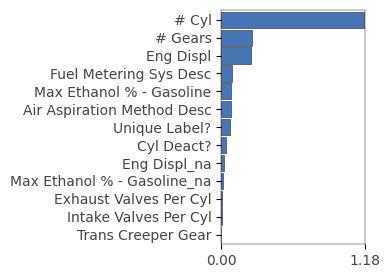

In [64]:
showimp(rf_final,X_final,y_final)

#### Questions (5 marks)

Provide answers to the following:
 1. calculate the percent difference between the results of Part 1 and Part 5 (make sure you are using the correct formula for percent difference) 
 2. based on the percent difference, state whether or not the results of Part 5 are an improvement over the results of Part 1

**Enter your answers here:**

In [65]:
actual_percent_diff = (abs(oob_score_final - oob_score_baseline) / oob_score_baseline) * 100
relative_percent_diff = (abs(oob_score_final - oob_score_baseline) / (oob_score_final + oob_score_baseline) / 2) * 100

print("The actual percentage difference is: ", f"{actual_percent_diff:.2f} %")
print("The relative percentage difference is: ", f"{relative_percent_diff:.2f} %")

The actual percentage difference is:  1.44 %
The relative percentage difference is:  0.36 %


#### Based on our analysis we can conclude that performance of our model declined by 1.44 % and complexity increases. Number of tree nodes and median of tree depth increases abruptly. 